# Import desired libraries


In [1]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import VimeoVideo
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted
%matplotlib inline
warnings.simplefilter(action="ignore", category=FutureWarning)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Import the Data


In [2]:
df=pd.read_csv("/kaggle/input/diamond-price-prediction/train.csv")


# Explore data


In [3]:
df.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [4]:
df.tail()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
43147,43148,0.52,Ideal,E,VS2,61.5,56.0,1760,5.16,5.18,3.18
43148,43149,0.72,Very Good,D,VS2,62.1,59.0,3016,5.70,5.73,3.55
43149,43150,0.44,Premium,I,VVS1,61.5,58.0,990,4.95,4.87,3.02
43150,43151,0.31,Premium,E,VS1,60.2,58.0,734,4.38,4.43,2.65
43151,43152,0.33,Ideal,G,VS2,61.2,55.0,743,4.49,4.46,2.74


In [5]:
df.sample(5)

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
23657,23658,0.71,Premium,F,VS1,62.1,53.0,2961,5.77,5.70,3.56
42344,42345,0.24,Very Good,D,VVS2,59.5,62.0,521,4.04,4.06,2.41
21748,21749,1.50,Good,I,SI1,61.1,63.0,8254,7.27,7.34,4.46
34371,34372,0.30,Good,G,VS2,63.1,58.0,491,4.23,4.27,2.68
7950,7951,0.51,Ideal,E,VS2,61.7,53.0,1709,5.20,5.18,3.20


In [6]:
df.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000




---


x, y, z have min value =0 --> which doesn't make any sense

---








In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB




---

So, there is no null value and all data types don't need any change


---



In [8]:
#check for duplicates
df[df.drop("Id",axis=1).duplicated()]

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
5428,5429,0.57,Premium,E,SI2,62.5,54.0,1058,5.35,5.30,3.33
6704,6705,2.01,Fair,H,SI2,64.9,56.0,10184,7.88,7.81,5.09
7723,7724,0.32,Ideal,H,VVS2,61.8,55.0,828,4.42,4.38,2.72
11089,11090,1.55,Very Good,H,SI1,63.2,57.0,7066,7.35,7.31,4.64
11334,11335,0.60,Very Good,E,SI2,63.2,60.0,1250,5.32,5.28,3.35
...,...,...,...,...,...,...,...,...,...,...,...
41648,41649,0.52,Ideal,D,VS2,61.8,55.0,1822,5.16,5.19,3.20
41775,41776,0.71,Good,E,SI2,57.5,58.0,1783,5.91,5.89,3.39
42165,42166,0.52,Premium,F,SI2,62.7,57.0,1073,5.11,5.07,3.19
42474,42475,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17




---

We have duplicates that we need to clean

---



# Cleaninig Data


1.   Remove zeros
2.   Remove Duplicates



In [9]:
# Remove 0 from x, y, z
df=df[((df.x>0) & (df.y>0) & (df.z>0))]

In [10]:
# Remove duplicates
print(df.shape)
df=df.drop("Id",axis=1).drop_duplicates()
print(df.shape)

(43135, 11)
(43038, 10)


# EDA

## #  Explore distributions 


In [11]:
df_hist=df[["carat","depth","price"]]
df_hist.head()

,carat,depth,price
0,1.06,61.8,4270
1,1.51,60.9,15164
2,0.32,61.3,828
3,0.53,61.2,1577
4,0.70,61.0,2596


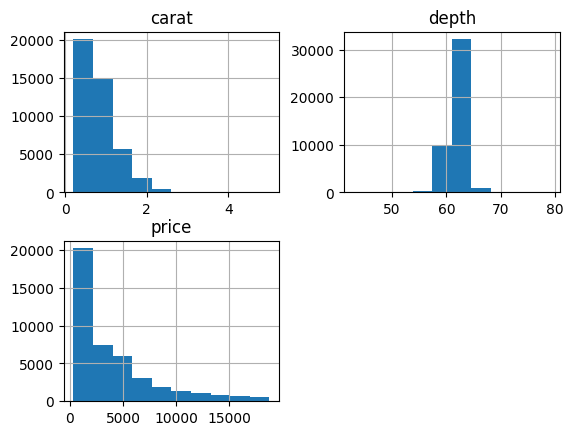

In [12]:
df_hist.hist();


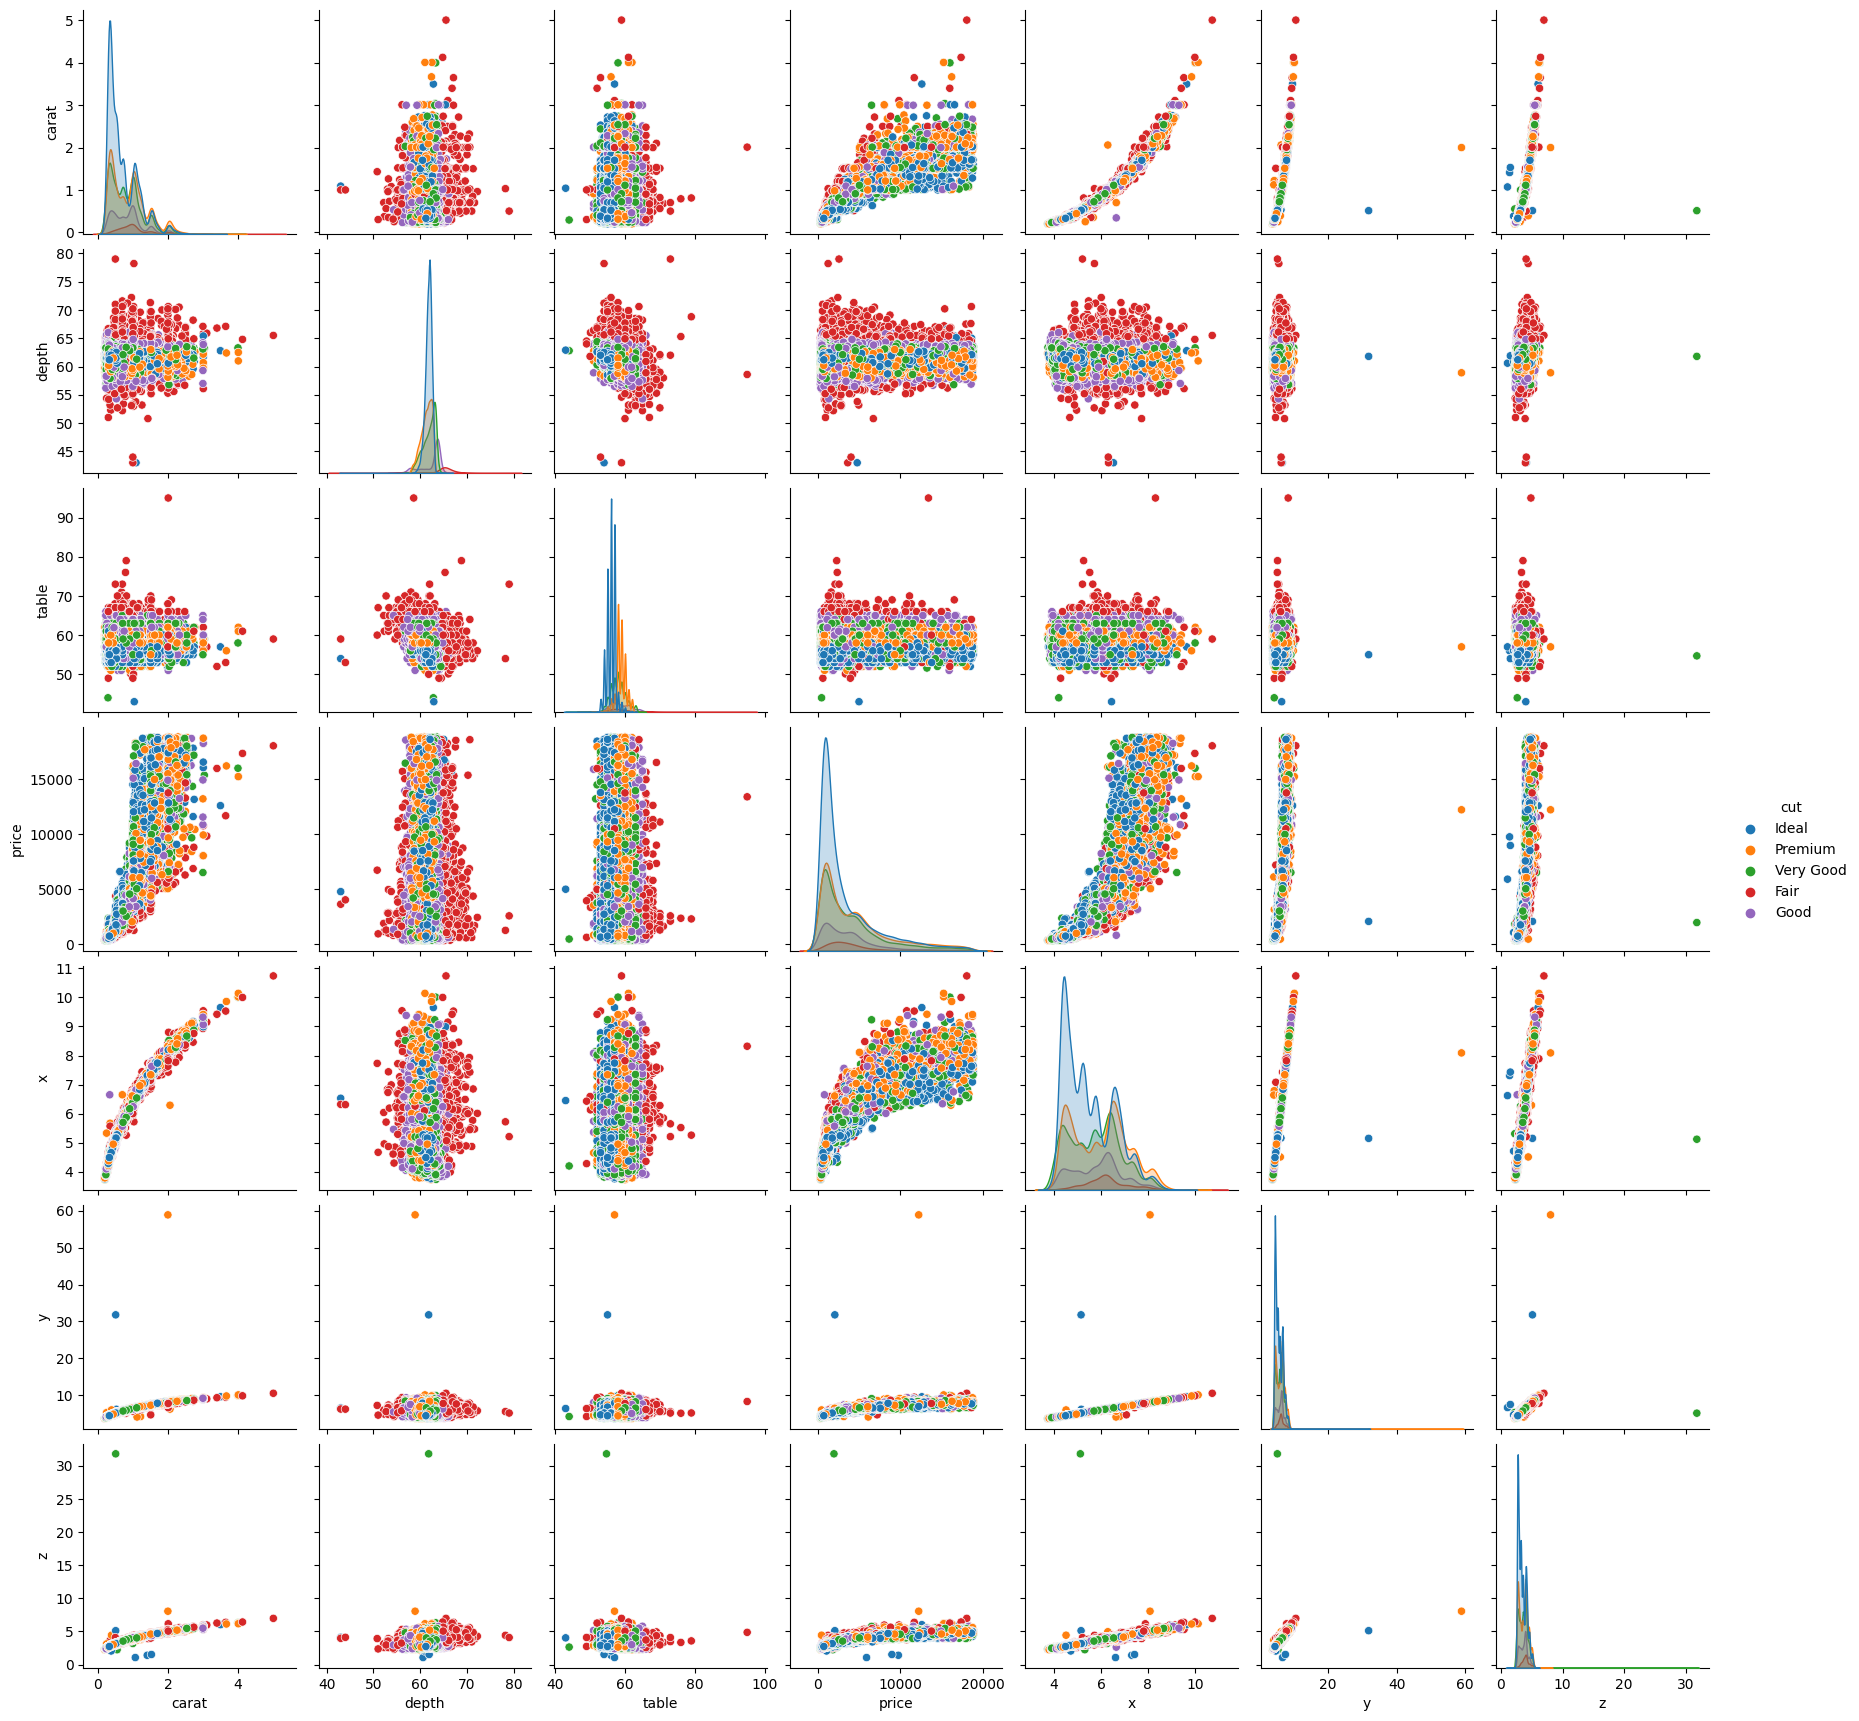

In [13]:
sns.pairplot(df, hue= "cut");


## # Relation between our features


In [14]:
df_ncorr=df.corr()
df_ncorr

,carat,depth,table,price,x,y,z
carat,1.000000,0.023742,0.182445,0.921864,0.977950,0.948674,0.957239
depth,0.023742,1.000000,-0.302658,-0.013395,-0.029648,-0.033384,0.090464
table,0.182445,-0.302658,1.000000,0.128029,0.197622,0.184538,0.152041
price,0.921864,-0.013395,0.128029,1.000000,0.887122,0.862800,0.864745
x,0.977950,-0.029648,0.197622,0.887122,1.000000,0.969159,0.971425
y,0.948674,-0.033384,0.184538,0.862800,0.969159,1.000000,0.948433
z,0.957239,0.090464,0.152041,0.864745,0.971425,0.948433,1.000000


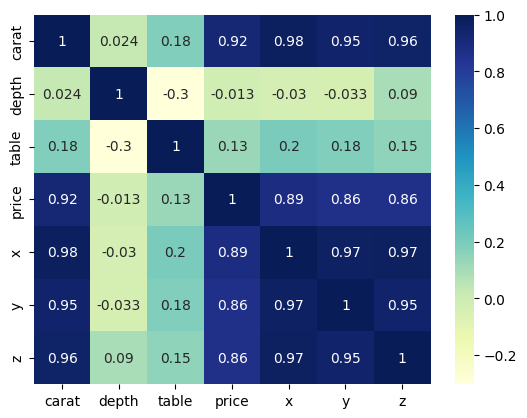

In [15]:
df_corr=sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


# Building Model



1.   Preprocessing 

2.   Split Data

2.   Linear Regression Model

1.   Random Forest Regression

1.   Pipline










## 1. Preprocessing


In [16]:
# to prepare categorical data we need to convert them to categorical
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df["cut"]=le.fit_transform(df["cut"])
df["color"]=le.fit_transform(df["color"])
df["clarity"]=le.fit_transform(df["clarity"])
df["clarity"].head()

0    3
1    7
2    5
3    5
4    7
Name: clarity, dtype: int64

## 2. Split Data






In [17]:
# split to features & target
features = df.drop(["price","x","y","z"], axis=1)
target = df["price"]

In [18]:
# split data to train & test
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(features,target, test_size=0.2, random_state=1000)

## 3.Linear Regression Model

In [19]:
# initiate the model
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear

LinearRegression()

In [20]:
# train the model
linear.fit(X_train, y_train)

LinearRegression()

In [21]:
# check
check_is_fitted(linear)

In [22]:
#predictions on test set
y_pred= linear.predict(X_test)
y_pred[:5]

array([-526.25811213, -497.31543066, 4353.632509  , -700.57956141,
       1701.98925134])

In [23]:
#R² Score
linear.score(X_test,y_test)

0.8831829331661827

In [24]:
#MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

919.0608935032999

In [25]:
# RMSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred,squared=False)

1349.1532005394397

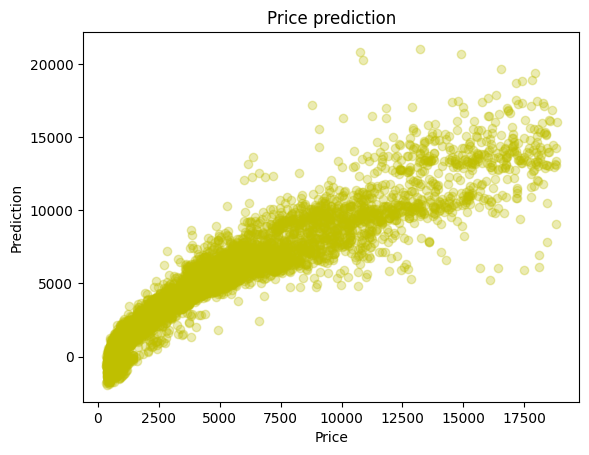

In [26]:
# visualize the relation 
plt.scatter(y_test,y_pred, color="y", alpha=0.3)
plt.xlabel("Price")
plt.ylabel("Prediction")
plt.title("Price prediction");

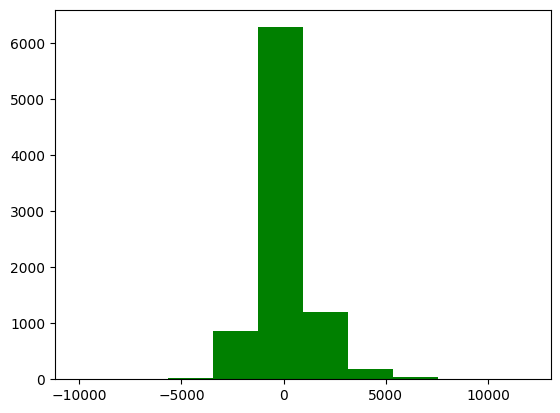

In [27]:
# Test Accracy
plt.hist(y_test-y_pred,color="g");

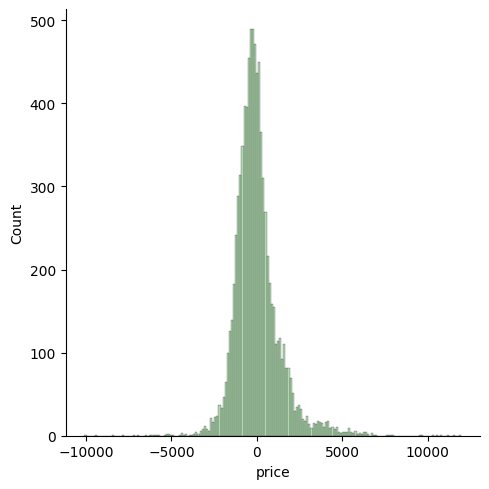

In [28]:
sns.displot(y_test-y_pred, color="g", alpha=0.3);


In [29]:
print("coefficient = ",linear.coef_)
print("intercept = ",linear.intercept_)

coefficient =  [8344.58605471   74.57909354 -256.3394576   307.5857281  -108.44934311
  -93.41048476]
intercept =  8631.66639629275


In [30]:
coefficient = linear.coef_
features_name= X_train.columns
# create Dict of features and its coef
features_coef= dict(zip(features_name, coefficient))
# Sort coefficients descendingly
sorted_coef= sorted(features_coef.items(), reverse=True)
sorted_coef

[('table', -93.4104847639031),
 ('depth', -108.44934311018487),
 ('cut', 74.57909354377631),
 ('color', -256.3394576029796),
 ('clarity', 307.5857281027033),
 ('carat', 8344.586054714022)]

### Building regression model but using (Cross-Validation)


In [31]:
# split to features & target
features = df.drop(["price","x","y","z"], axis=1)
target = df["price"]

#cross-validation
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=9,shuffle=True,random_state=42)
reg=LinearRegression()
cv_results= cross_val_score(reg,features,target,cv=kf)

#Evaluating cross-validation performance
print(cv_results)

print(np.mean(cv_results), np.std(cv_results))

print(np.quantile(cv_results,[0.025,0.975]))

[0.88719849 0.88141283 0.87810279 0.87765401 0.88455636 0.88358753
 0.87580074 0.87617162 0.88380614]
0.8809211682247179 0.003882844501003217
[0.87587491 0.88667007]


## 4.Random Forest Regression


In [32]:
# split to features & target
features = df.drop(["price","x","y","z"], axis=1)
target = df["price"]

# split data to train & test
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(features,target, test_size=0.2, random_state=1000)

# import the library and intialize the model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)

#prediction
y_pred=rf.predict(X_test)

# Calculate train accuracy for Random Forest model
rf_train_acc = rf.score(X_train, y_train)
print("Random Forest train accuracy:", rf_train_acc)

# Calculate test accuracy for Random Forest model
rf_test_acc = rf.score(X_test, y_test) #R²
print("Random Forest test accuracy:", rf_test_acc)

print('MAE= ',mean_absolute_error(y_test,y_pred)) #MAE
print('RMSE= ',mean_squared_error(y_test,y_pred,squared=False)) #RMSE


Random Forest train accuracy: 0.9970659995021242
Random Forest test accuracy: 0.9797075746112717
MAE=  286.71201633727117
RMSE=  562.309082318982


## 5. Pipeline of standard scalar and model

In [33]:
# import required libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

In [34]:
# split set
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

Diamond_Price_Train = train_set.drop("price", axis=1)
Diamond_Price_labels = train_set["price"].copy()

num_attribs = list(Diamond_Price_Train)

In [35]:
#Building the model
num_pipeline = Pipeline([('Std_Scaler', StandardScaler())])
full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs)])
Diamond_Price_prepared = full_pipeline.fit_transform(Diamond_Price_Train)

In [36]:
Diamond_Price_prepared[:,:] # after appling Scalling


array([[ 0.42611771,  0.43934789, -0.93640206, ...,  0.63107279,
         0.56396384,  0.35995691],
       [ 0.53189002,  1.41306837, -0.93640206, ...,  0.7026743 ,
         0.72856041,  0.72203053],
       [-0.84315001,  1.41306837,  0.23399428, ..., -0.86360873,
        -0.81344954, -0.90005928],
       ...,
       [-0.08158937,  0.43934789, -0.35120389, ...,  0.13881241,
         0.09616307,  0.02684918],
       [-0.01812599,  1.41306837, -0.93640206, ...,  0.10301166,
         0.122152  ,  0.20064452],
       [-0.46236969, -0.5343726 ,  0.23399428, ..., -0.32659741,
        -0.28500792, -0.34970738]])

In [37]:
Diamond_Price_prepared.shape

(34430, 9)

In [38]:
#XGBoost
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import time

params = { 'max_depth': [8],
           'n_estimators': [250],
           'colsample_bytree': [0.9], 
           'subsample': [0.8],
          'eta':[0.04],
          'min_child_weight':[3],
          'gamma':[0.0],'lambda':[2],
          'alpha':[1]}

model = xgb.XGBRegressor()
grid = GridSearchCV(estimator=model, 
                   param_grid=params,
                   scoring='r2', 
                   verbose=1)
start = time.time()
grid.fit(Diamond_Price_prepared, Diamond_Price_labels)
end = time.time()
print(end-start)
print("Best parameters:", grid.best_params_)
print("Best Score (R2): ", (grid.best_score_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
29.56529998779297
Best parameters: {'alpha': 1, 'colsample_bytree': 0.9, 'eta': 0.04, 'gamma': 0.0, 'lambda': 2, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 250, 'subsample': 0.8}
Best Score (R2):  0.9818819001755564


In [39]:
XGB_Model = grid.best_estimator_

In [40]:
#Preparing the test set
Diamond_Price_Test = test_set.drop("price", axis=1)
Diamond_Price_Test_labels = test_set["price"].copy()

Diamond_Price_Test_num = Diamond_Price_Test
num_attribs = list(Diamond_Price_Test_num)
Diamond_Price_Test_Prepared = full_pipeline.transform(Diamond_Price_Test)

In [41]:
# Evaluation with XGB Train set

XGB_pred = XGB_Model.predict(Diamond_Price_prepared)
XGB_mse = mean_squared_error(Diamond_Price_labels.values, XGB_pred)
XGB_rmse = np.sqrt(XGB_mse)
XGB_rmse

370.86302521067205

In [42]:
# Evaluation with XGB Test set

XGB_pred = XGB_Model.predict(Diamond_Price_Test_Prepared)
XGB_mse = mean_squared_error(Diamond_Price_Test_labels.values, XGB_pred)
XGB_rmse = np.sqrt(XGB_mse)
XGB_rmse

530.1031837971359

In [43]:
#Save the model
import joblib

joblib.dump(XGB_Model, "Diamond_RF_model_8.pkl")

['Diamond_RF_model_8.pkl']

In [44]:
#Applying the model
Test = pd.read_csv("/kaggle/input/diamond-price-prediction/test.csv")
Test.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [45]:
Test.describe()

,Id,carat,depth,table,x,y,z
count,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000
mean,5394.500000,0.798279,61.758315,57.452531,5.729514,5.732559,3.539398
std,3114.371686,0.475700,1.421266,2.236933,1.123736,1.115090,0.695483
min,1.000000,0.200000,54.000000,50.000000,0.000000,0.000000,0.000000
25%,2697.750000,0.400000,61.100000,56.000000,4.720000,4.727500,2.910000
50%,5394.500000,0.700000,61.800000,57.000000,5.700000,5.710000,3.520000
75%,8091.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.030000
max,10788.000000,4.500000,79.000000,73.000000,10.230000,10.160000,6.720000


In [46]:
Test_Id = Test[["Id"]]
Test.drop(columns=["Id"], inplace=True)

In [47]:
# to prepare categorical data we need to convert them to categorical
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
Test["cut"]=le.fit_transform(Test["cut"])
Test["color"]=le.fit_transform(Test["color"])
Test["clarity"]=le.fit_transform(Test["clarity"])
Test["clarity"].head()

0    7
1    5
2    4
3    3
4    6
Name: clarity, dtype: int64

In [48]:
#Apply Model on the Test file
Test_Prepared = full_pipeline.transform(Test)
final_predictions = XGB_Model.predict(Test_Prepared)
final_predictions

array([  858.66785,  2830.0776 ,   859.8916 , ...,  4279.8022 ,
        4666.179  , 14114.99   ], dtype=float32)

In [49]:
# save the results for submission
sample_submission = Test_Id
sample_submission["price"] = final_predictions.tolist()

/tmp/ipykernel_21/2682010353.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_submission["price"] = final_predictions.tolist()


In [50]:
#save to csv
sample_submission.to_csv("sample_submission.csv", index = None)